In [550]:
#necessary libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import Pipeline



In [551]:
# Load the dataset
df = pd.read_csv('medical_students_dataset.csv')

In [552]:
df = df.drop(columns=['Student ID'])

# Split dataset into features and target variables
X = df.drop(columns=['Diabetes', 'Smoking'])
Y = df[['Diabetes', 'Smoking']]
 # Target (multiple columns)

# Split into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Confirm output
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)


(160000, 10) (40000, 10) (160000, 2) (40000, 2)


In [553]:
# Explore the dataset
print(df.info())      


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             180000 non-null  float64
 1   Gender          180000 non-null  object 
 2   Height          180000 non-null  float64
 3   Weight          180000 non-null  float64
 4   Blood Type      180000 non-null  object 
 5   BMI             180000 non-null  float64
 6   Temperature     180000 non-null  float64
 7   Heart Rate      180000 non-null  float64
 8   Blood Pressure  180000 non-null  float64
 9   Cholesterol     180000 non-null  float64
 10  Diabetes        180000 non-null  object 
 11  Smoking         180000 non-null  object 
dtypes: float64(8), object(4)
memory usage: 18.3+ MB
None


In [554]:
# Overview of data types and missing values
print(df.describe())  # Statistical summary of numerical columns

                 Age         Height  ...  Blood Pressure    Cholesterol
count  180000.000000  180000.000000  ...   180000.000000  180000.000000
mean       26.021561     174.947103  ...      114.558033     184.486361
std         4.890528      14.447560  ...       14.403353      37.559678
min        18.000000     150.000041  ...       90.000000     120.000000
25%        22.000000     162.476110  ...      102.000000     152.000000
50%        26.000000     174.899914  ...      115.000000     184.000000
75%        30.000000     187.464417  ...      127.000000     217.000000
max        34.000000     199.998639  ...      139.000000     249.000000

[8 rows x 8 columns]


In [555]:
print(df.head())      # Preview first few rows

    Age  Gender      Height  ...  Cholesterol Diabetes  Smoking
0  18.0  Female  161.777924  ...        203.0       No      NaN
1   NaN    Male  152.069157  ...        163.0       No       No
2  32.0  Female  182.537664  ...        216.0      Yes       No
3  30.0    Male  182.112867  ...        141.0       No      Yes
4  23.0  Female         NaN  ...        231.0       No       No

[5 rows x 12 columns]


In [556]:
print("Missing values count for each column:")
print(df.isnull().sum())

# Check percentage of missing values
print("\nPercentage of missing values for each column:")
print((df.isnull().sum() / len(df)) * 100)

Missing values count for each column:
Age               20000
Gender            20000
Height            20000
Weight            20000
Blood Type        20000
BMI               20000
Temperature       20000
Heart Rate        20000
Blood Pressure    20000
Cholesterol       20000
Diabetes          20000
Smoking           20000
dtype: int64

Percentage of missing values for each column:
Age               10.0
Gender            10.0
Height            10.0
Weight            10.0
Blood Type        10.0
BMI               10.0
Temperature       10.0
Heart Rate        10.0
Blood Pressure    10.0
Cholesterol       10.0
Diabetes          10.0
Smoking           10.0
dtype: float64


In [557]:
# Identify duplicated rows
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

         Age  Gender      Height  ...  Cholesterol Diabetes  Smoking
100003  30.0    Male  182.112867  ...        141.0       No      Yes
100007  28.0    Male  186.489402  ...        128.0       No       No
100011  34.0  Female  182.416302  ...        247.0       No       No
100018  31.0  Female  158.790160  ...        172.0      NaN       No
100019  31.0    Male  166.489929  ...        223.0       No       No
...      ...     ...         ...  ...          ...      ...      ...
199961  31.0    Male  180.859321  ...        223.0       No       No
199962  18.0  Female  180.133710  ...        184.0       No       No
199965  22.0  Female  166.562901  ...        152.0      Yes       No
199973  25.0  Female  156.297842  ...        164.0      Yes       No
199985  23.0  Female  162.884951  ...        188.0       No      Yes

[9296 rows x 12 columns]


In [558]:
df=df.drop_duplicates()
print("DataFrame after dropping duplicates:")
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)


DataFrame after dropping duplicates:
Empty DataFrame
Columns: [Age, Gender, Height, Weight, Blood Type, BMI, Temperature, Heart Rate, Blood Pressure, Cholesterol, Diabetes, Smoking]
Index: []


In [559]:
df.duplicated().sum()

np.int64(0)

In [560]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 190704 entries, 0 to 199999
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             170828 non-null  float64
 1   Gender          170796 non-null  object 
 2   Height          170815 non-null  float64
 3   Weight          170816 non-null  float64
 4   Blood Type      170806 non-null  object 
 5   BMI             170825 non-null  float64
 6   Temperature     170819 non-null  float64
 7   Heart Rate      170820 non-null  float64
 8   Blood Pressure  170831 non-null  float64
 9   Cholesterol     170832 non-null  float64
 10  Diabetes        170827 non-null  object 
 11  Smoking         170822 non-null  object 
dtypes: float64(8), object(4)
memory usage: 18.9+ MB
None


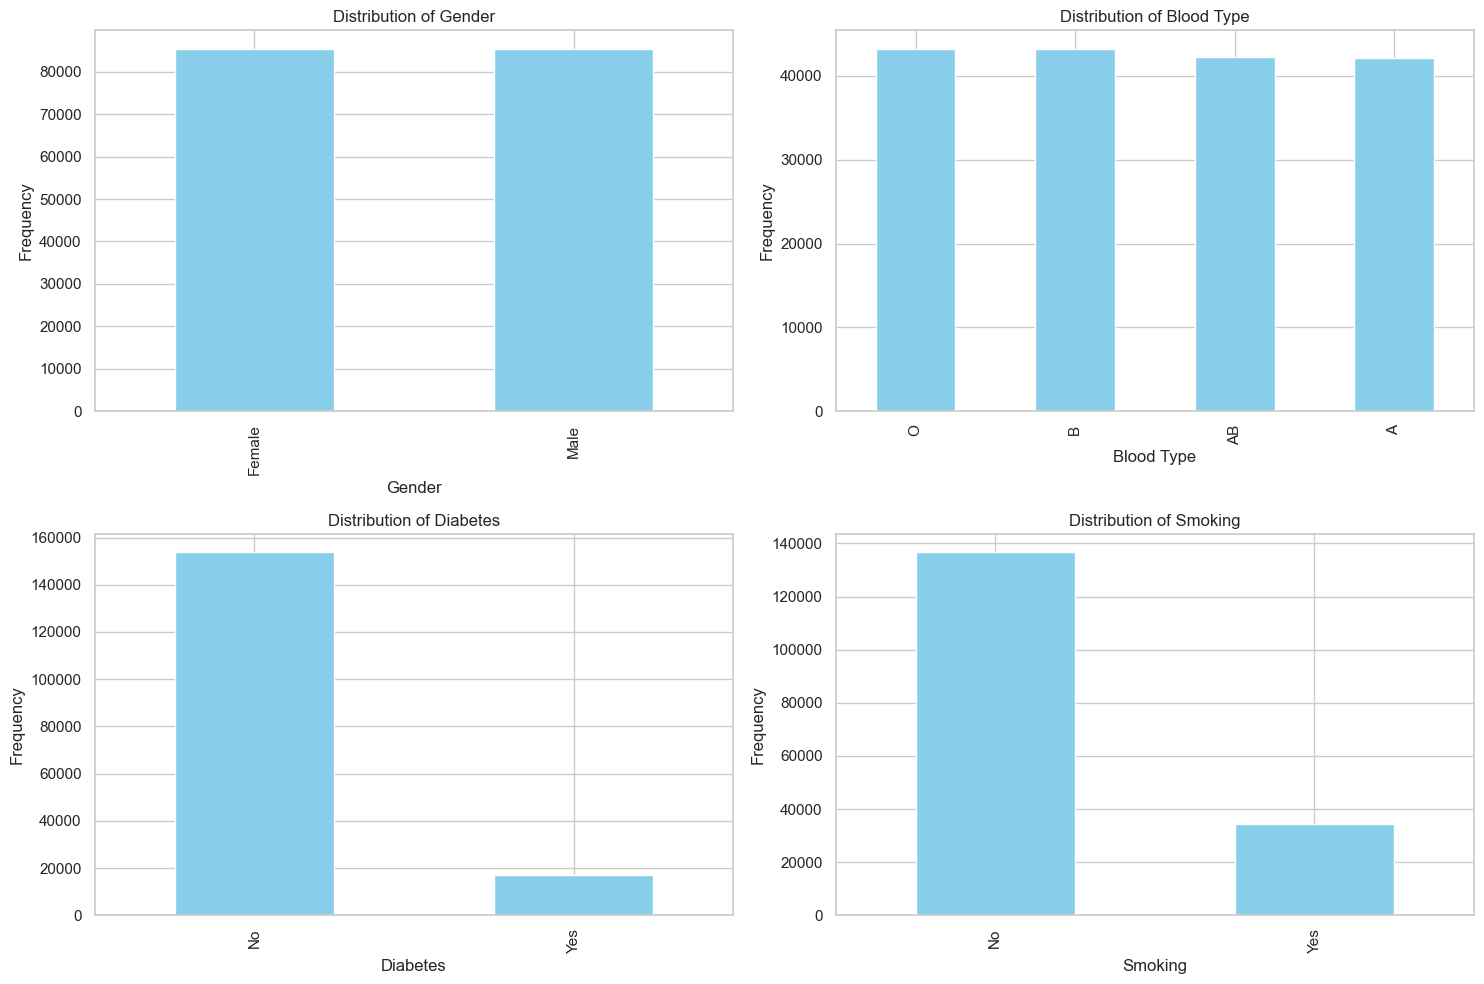

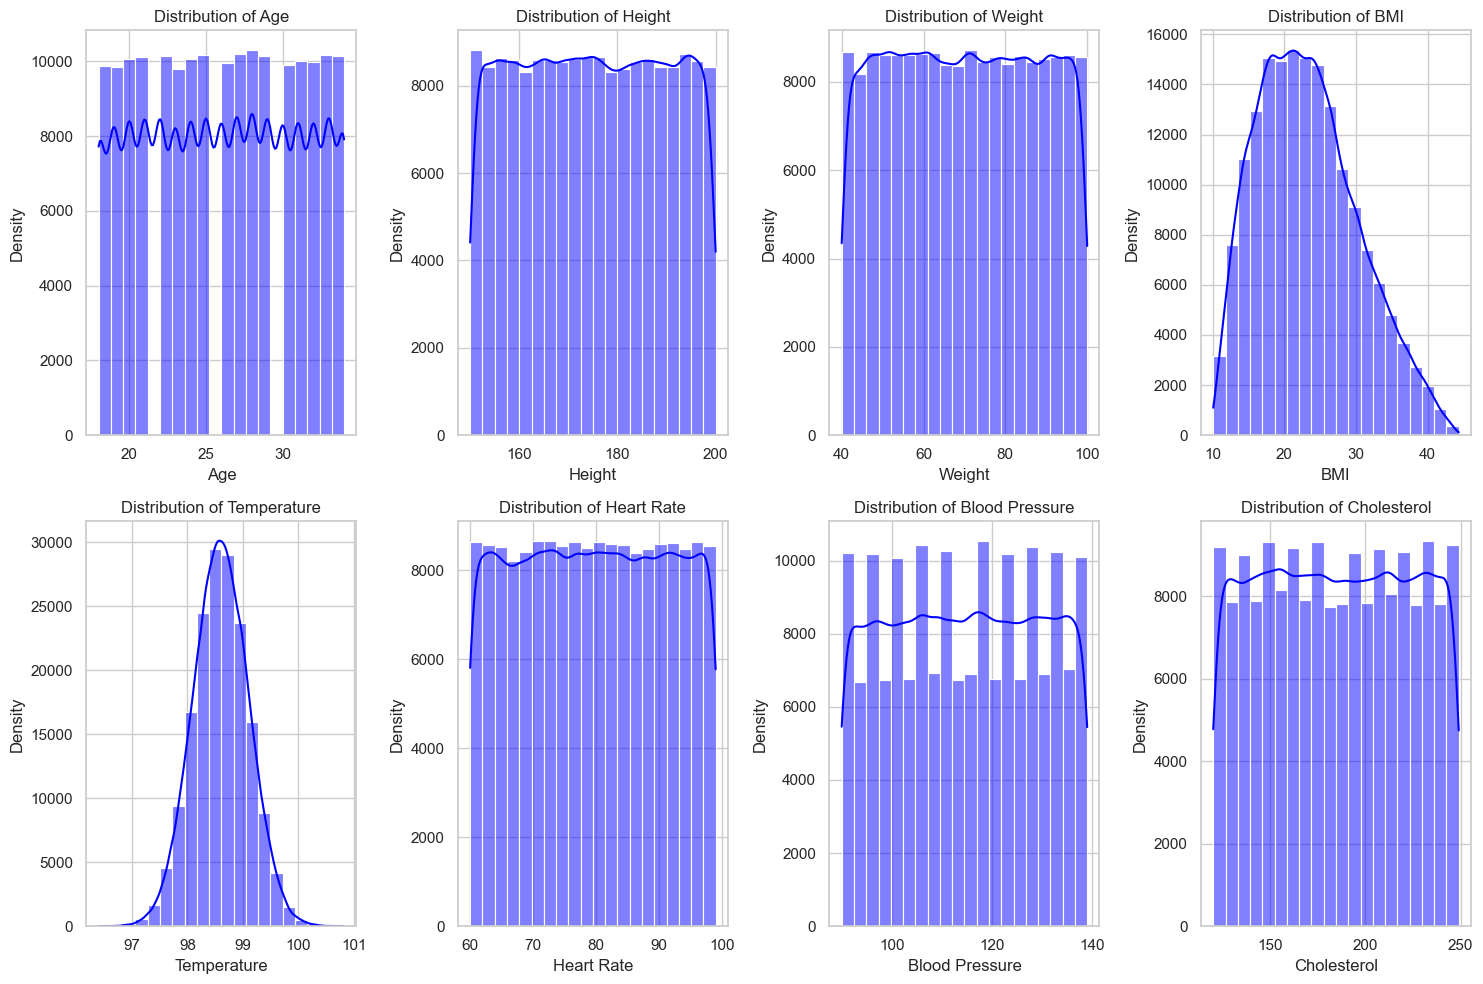

In [561]:
# Plotting the data distribution
# Categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot bar graphs for categorical variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, (len(categorical_cols) + 1) // 2, i + 1)
    df[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Plot histograms for numerical variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, (len(numerical_cols) + 1) // 2, i + 1)
    sns.histplot(df[col], kde=True, color='blue', bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
plt.tight_layout()
plt.show()

In [562]:
print("Missing values count for each column:")
print(df.isnull().sum())

# Check percentage of missing values
print("\nPercentage of missing values for each column:")
print((df.isnull().sum() / len(df)) * 100)

Missing values count for each column:
Age               19876
Gender            19908
Height            19889
Weight            19888
Blood Type        19898
BMI               19879
Temperature       19885
Heart Rate        19884
Blood Pressure    19873
Cholesterol       19872
Diabetes          19877
Smoking           19882
dtype: int64

Percentage of missing values for each column:
Age               10.422435
Gender            10.439215
Height            10.429252
Weight            10.428727
Blood Type        10.433971
BMI               10.424008
Temperature       10.427154
Heart Rate        10.426630
Blood Pressure    10.420862
Cholesterol       10.420337
Diabetes          10.422959
Smoking           10.425581
dtype: float64


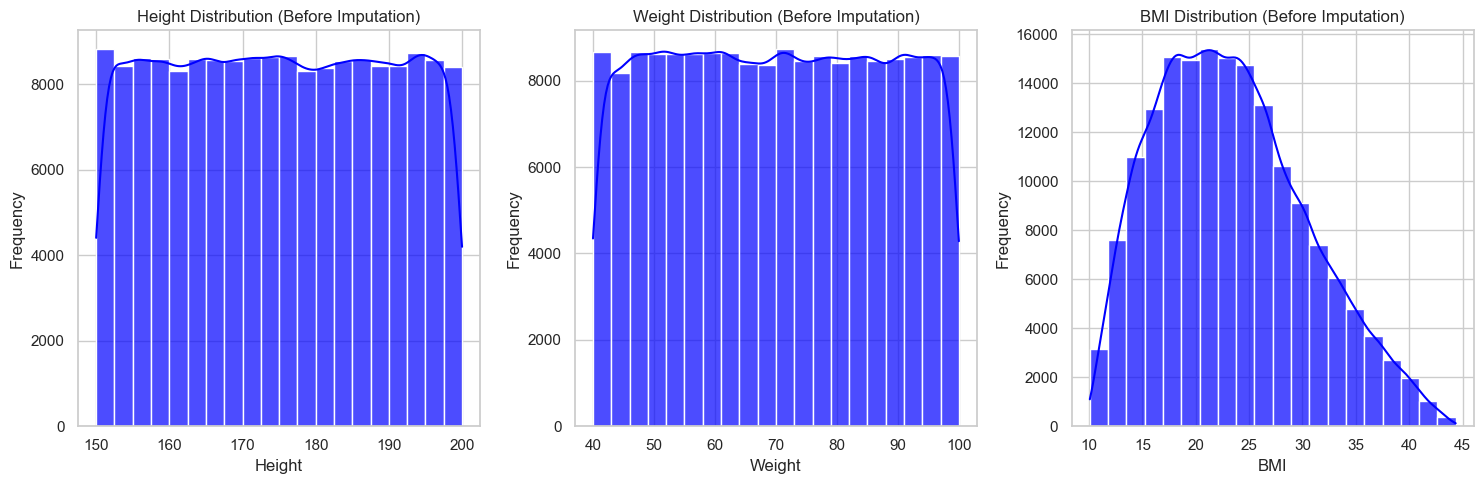

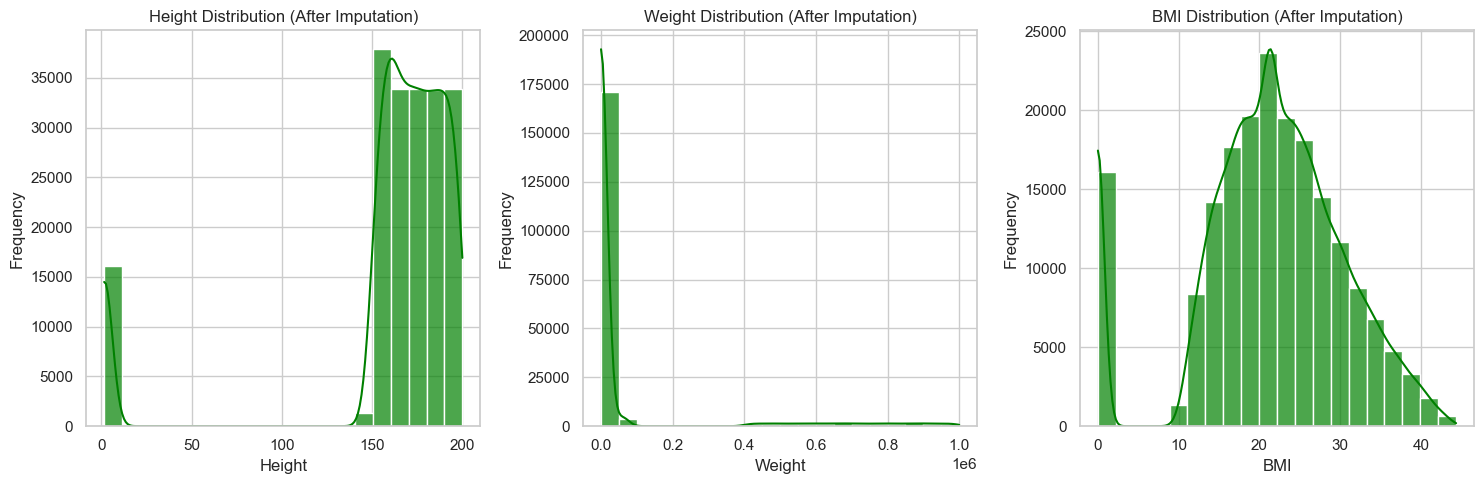


Updated original dataset with consistent values:
         Age  Gender      Height  ...  Cholesterol Diabetes  Smoking
0       18.0  Female  161.777924  ...        203.0       No      NaN
1        NaN    Male  152.069157  ...        163.0       No       No
2       32.0  Female  182.537664  ...        216.0      Yes       No
3       30.0    Male  182.112867  ...        141.0       No      Yes
4       23.0  Female  160.013481  ...        231.0       No       No
...      ...     ...         ...  ...          ...      ...      ...
199995  24.0    Male  176.503260  ...        130.0       No       No
199996  29.0  Female  163.917675  ...        198.0       No      Yes
199997  34.0  Female    1.732755  ...        154.0      NaN       No
199998  30.0  Female  156.446944  ...        225.0       No       No
199999  20.0  Female  153.927409  ...        132.0      NaN       No

[190704 rows x 12 columns]


In [563]:
def compute_and_impute_remaining_values(df):
    """
    Computes and imputes missing values for 'Height', 'Weight', and 'BMI' 
    based on the BMI formula and ensures consistency.

    Parameters:
    - df (pd.DataFrame): DataFrame containing 'Height', 'Weight', and 'BMI'.

    Returns:
    - pd.DataFrame: Updated DataFrame with imputed values.
    """
    # Compute missing values based on available columns using the BMI formula
    for index, row in df.iterrows():
        if pd.isnull(row['BMI']) and not pd.isnull(row['Weight']) and not pd.isnull(row['Height']):
            # Calculate BMI if missing and Height and Weight are available
            df.at[index, 'BMI'] = row['Weight'] / (row['Height'] ** 2)
        elif pd.isnull(row['Weight']) and not pd.isnull(row['BMI']) and not pd.isnull(row['Height']):
            # Calculate Weight if missing and BMI and Height are available
            df.at[index, 'Weight'] = row['BMI'] * (row['Height'] ** 2)
        elif pd.isnull(row['Height']) and not pd.isnull(row['BMI']) and not pd.isnull(row['Weight']):
            # Calculate Height if missing and BMI and Weight are available
            df.at[index, 'Height'] = np.sqrt(row['Weight'] / row['BMI'])

    # Compute the mean values for each column to impute remaining missing data
    mean_height = df['Height'].mean()
    mean_weight = df['Weight'].mean()
    mean_bmi = df['BMI'].mean()

    # Impute remaining missing values
    for index, row in df.iterrows():
        if pd.isnull(row['Height']):
            # Default to mean Height if dependencies are unavailable
            df.at[index, 'Height'] = mean_height
        if pd.isnull(row['Weight']):
            # Default to mean Weight if dependencies are unavailable
            df.at[index, 'Weight'] = mean_weight
        if pd.isnull(row['BMI']):
            # Default to mean BMI if dependencies are unavailable
            df.at[index, 'BMI'] = mean_bmi

    return df

# Extract relevant columns for imputation
height_weight_bmi_df = df[['Height', 'Weight', 'BMI']]

# Plot distributions before imputation
plt.figure(figsize=(15, 5))
for i, col in enumerate(['Height', 'Weight', 'BMI']):
    plt.subplot(1, 3, i + 1)
    sns.histplot(height_weight_bmi_df[col], kde=True, bins=20, color='blue', alpha=0.7)
    plt.title(f'{col} Distribution (Before Imputation)')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Apply the imputation function
height_weight_bmi_df = compute_and_impute_remaining_values(height_weight_bmi_df)

# Update the original DataFrame with imputed values
df[['Height', 'Weight', 'BMI']] = height_weight_bmi_df

# Plot distributions after imputation
plt.figure(figsize=(15, 5))
for i, col in enumerate(['Height', 'Weight', 'BMI']):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=20, color='green', alpha=0.7)
    plt.title(f'{col} Distribution (After Imputation)')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Display the updated DataFrame
print("\nUpdated original dataset with consistent values:")
print(df)


C:\Users\NOOR UL IEMAN\AppData\Local\Temp\ipykernel_6228\2374202416.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df_original, ax=axes[0, 0], palette='Set2')
C:\Users\NOOR UL IEMAN\AppData\Local\Temp\ipykernel_6228\2374202416.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Blood Type', data=df_original, ax=axes[0, 1], palette='Set2')
C:\Users\NOOR UL IEMAN\AppData\Local\Temp\ipykernel_6228\2374202416.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, ax=axes[1, 0], palette='Set1')


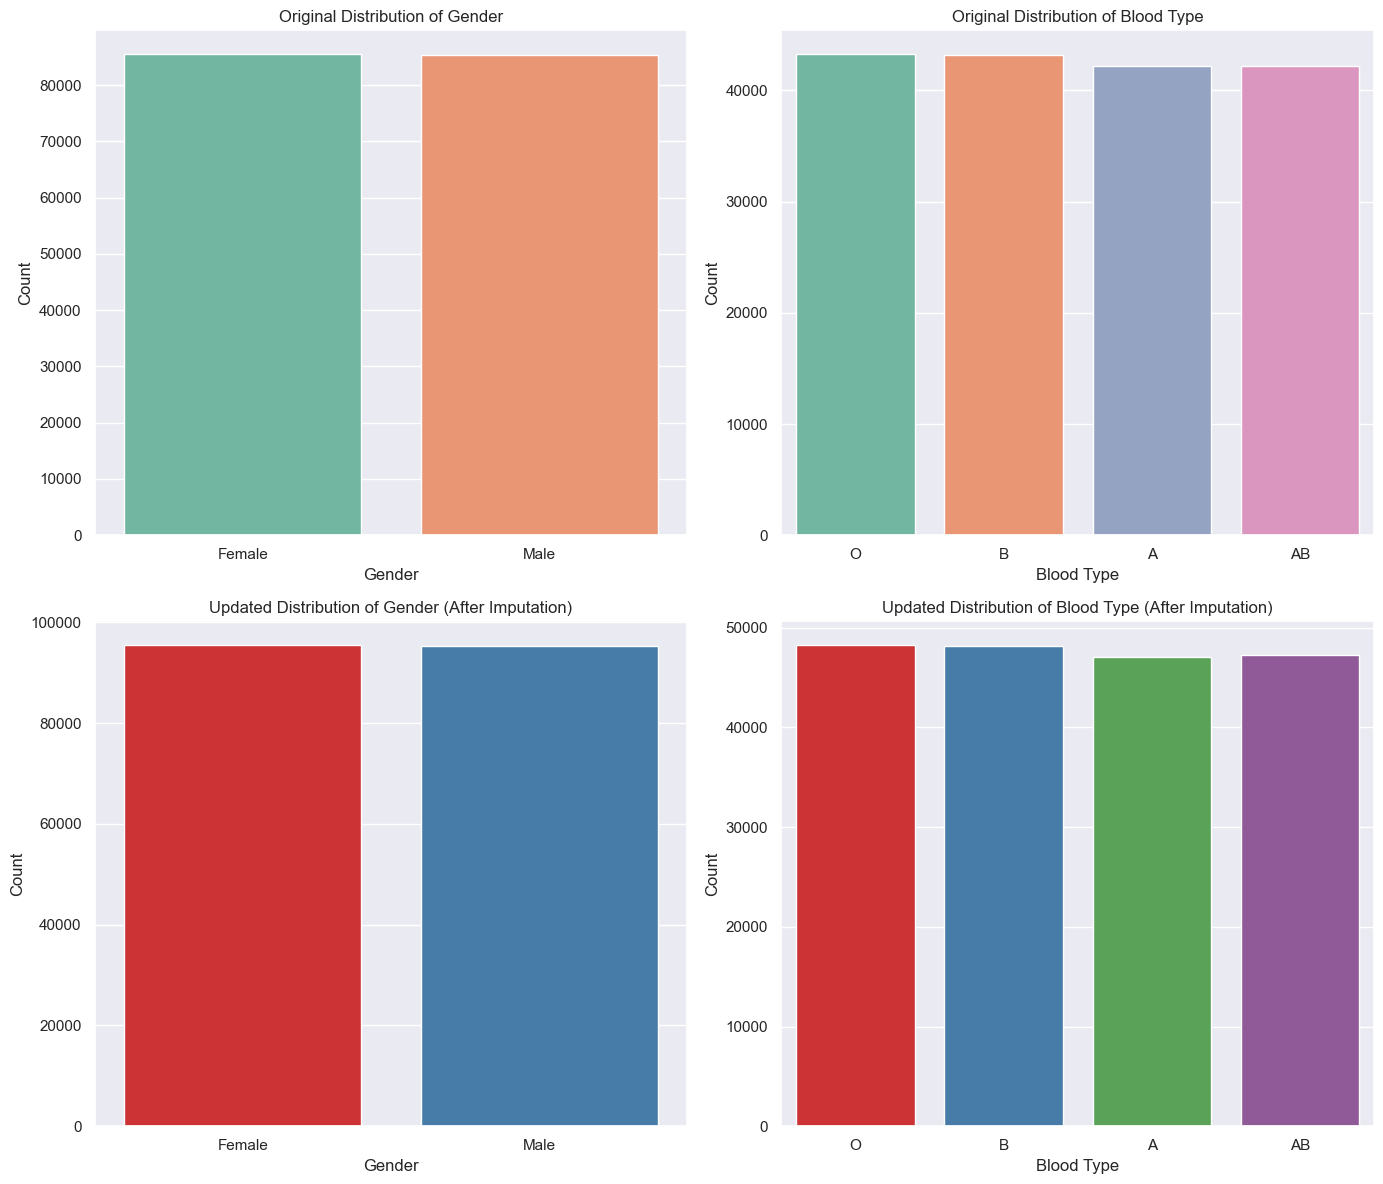

In [564]:
# Set the style for the plots
sns.set(style="darkgrid")

# Create a copy of the original data for comparison
df_original = df.copy()

# Function to impute missing categorical values with random choices
def impute_categorical_randomly(df, column_name):
    """
    Imputes missing values in a specified categorical column with random choices 
    from the non-missing values in the column.
    """
    if column_name in df.columns:
        unique_values = df[column_name].dropna().unique()
        if len(unique_values) > 0:
            df[column_name] = df[column_name].apply(
                lambda x: x if pd.notna(x) else np.random.choice(unique_values)
            )
        else:
            print(f"No unique values found in column '{column_name}' to impute.")
    else:
        print(f"Column '{column_name}' does not exist in the DataFrame.")

# Impute missing values for 'Blood Type' and 'Gender'
impute_categorical_randomly(df, 'Blood Type')
impute_categorical_randomly(df, 'Gender')

# Create a subplot grid with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Original distribution of 'Gender'
sns.countplot(x='Gender', data=df_original, ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('Original Distribution of Gender')
axes[0, 0].set_xlabel('Gender')
axes[0, 0].set_ylabel('Count')

# Original distribution of 'Blood Type'
sns.countplot(x='Blood Type', data=df_original, ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('Original Distribution of Blood Type')
axes[0, 1].set_xlabel('Blood Type')
axes[0, 1].set_ylabel('Count')

# Updated distribution of 'Gender'
sns.countplot(x='Gender', data=df, ax=axes[1, 0], palette='Set1')
axes[1, 0].set_title('Updated Distribution of Gender (After Imputation)')
axes[1, 0].set_xlabel('Gender')
axes[1, 0].set_ylabel('Count')

# Updated distribution of 'Blood Type'
sns.countplot(x='Blood Type', data=df, ax=axes[1, 1], palette='Set1')
axes[1, 1].set_title('Updated Distribution of Blood Type (After Imputation)')
axes[1, 1].set_xlabel('Blood Type')
axes[1, 1].set_ylabel('Count')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


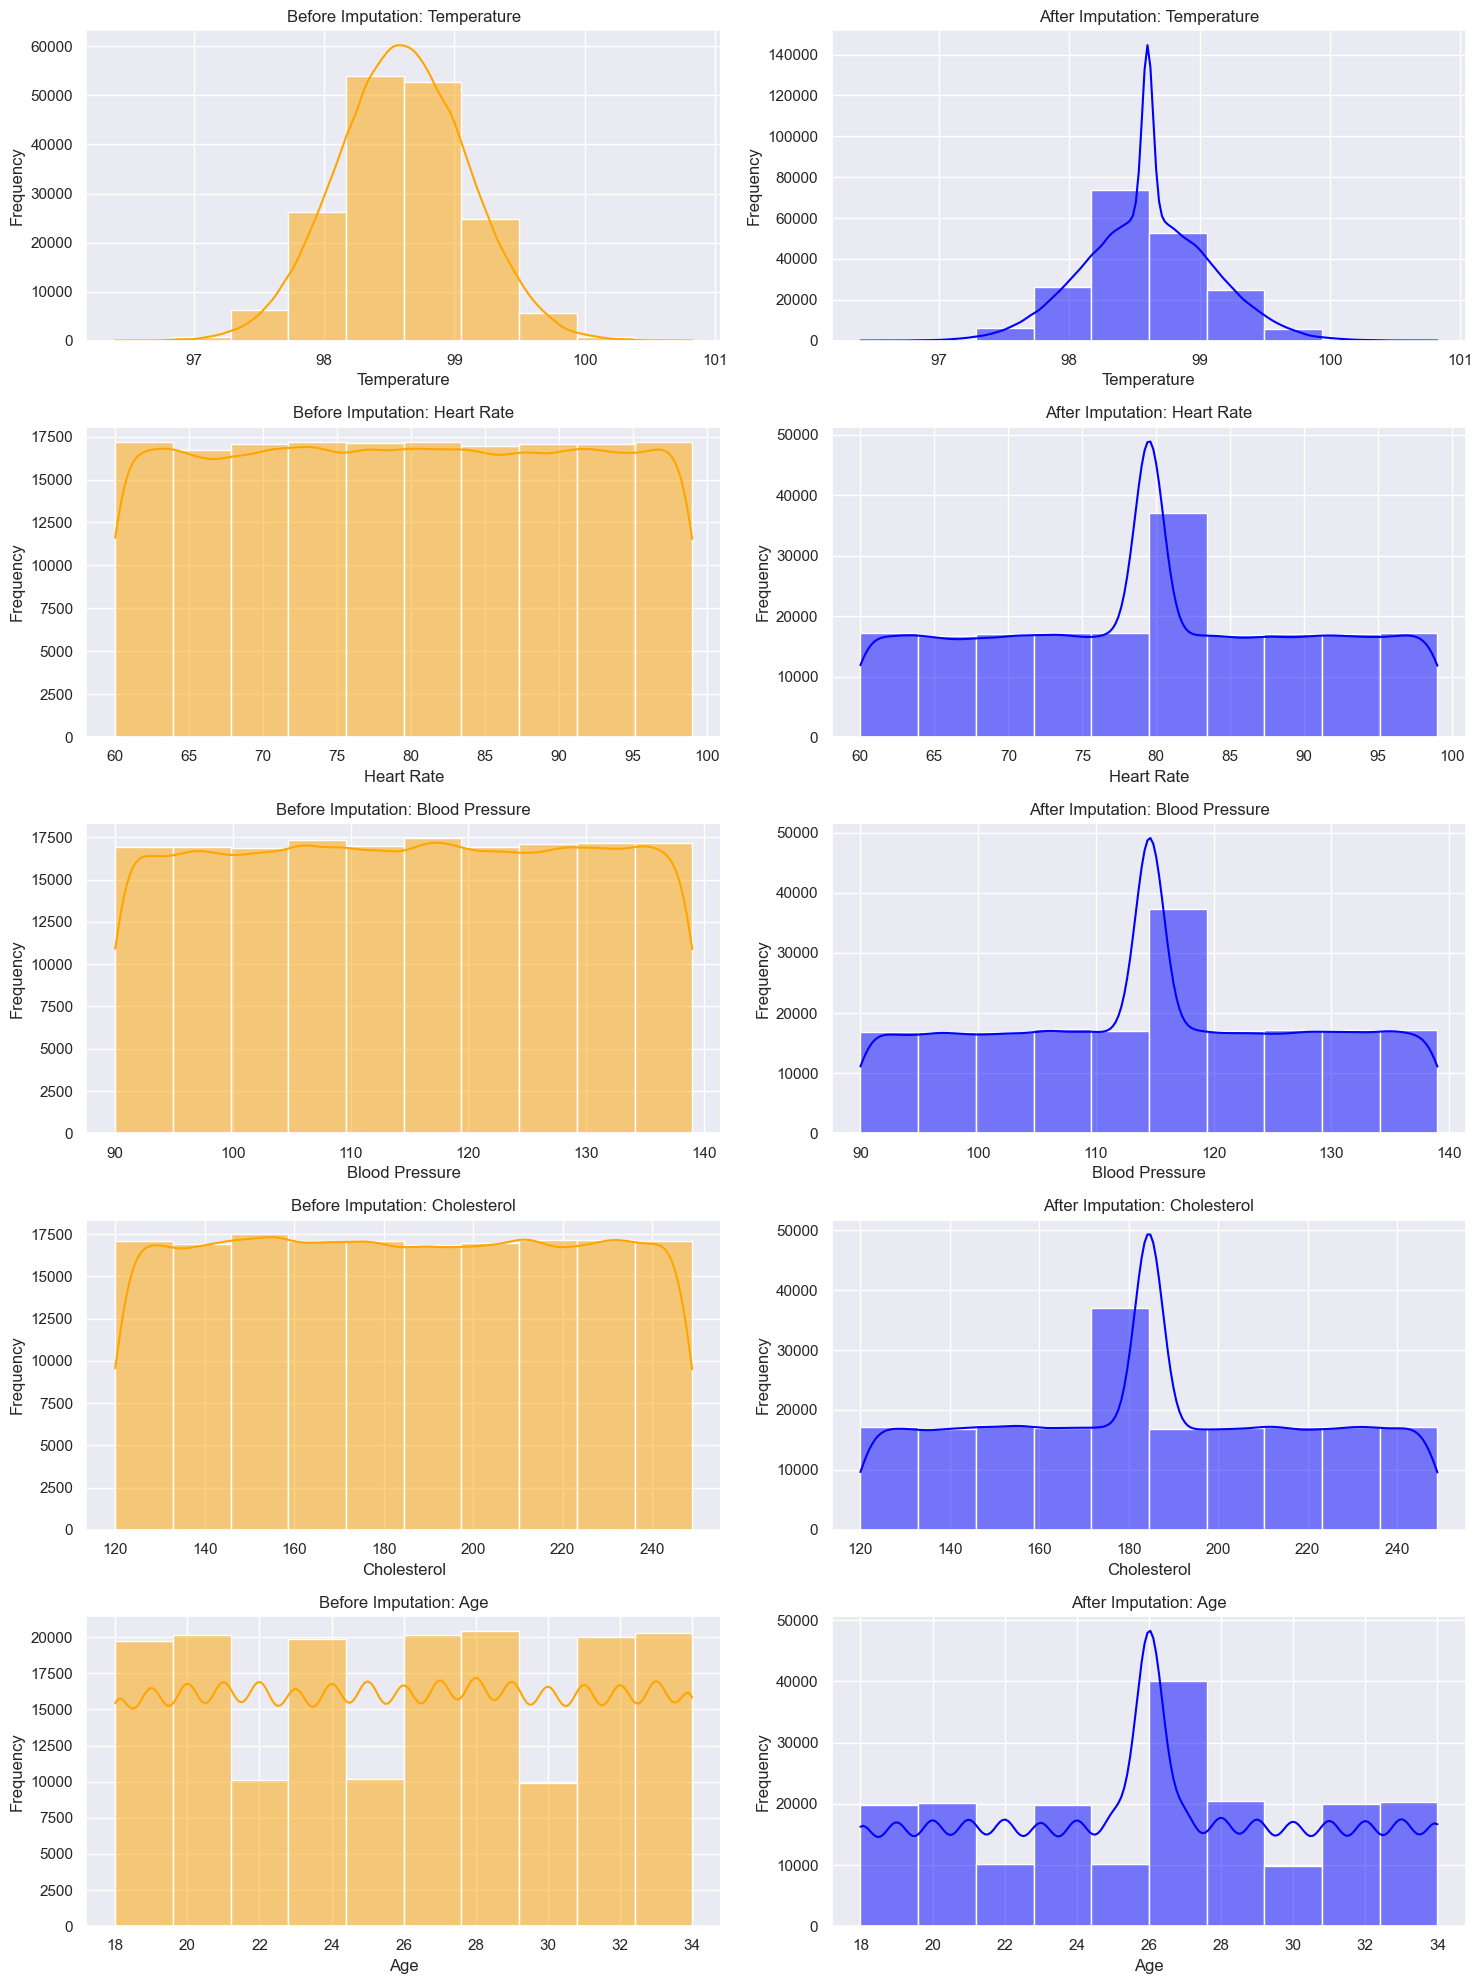

In [565]:
def replace_nan_with_mean(df, columns):
    """
    Replace NaN values with the mean for specified columns in a DataFrame.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        columns (list): A list of column names to process.

    Returns:
        pd.DataFrame: The DataFrame with NaN values replaced by column means.
    """
    for column in columns:
        if column in df.columns:
            df[column] = df[column].replace(np.nan, df[column].mean())
    return df

# Example usage
columns_to_process = ['Temperature', 'Heart Rate', 'Blood Pressure', 'Cholesterol', 'Age']
df = replace_nan_with_mean(df, columns_to_process)
# Columns to plot
columns_to_plot = ['Temperature', 'Heart Rate', 'Blood Pressure', 'Cholesterol', 'Age']

# Create a figure for both original and imputed distributions
plt.figure(figsize=(15, 20))

for i, column in enumerate(columns_to_plot, 1):
    # Before imputation (original dataset)
    plt.subplot(len(columns_to_plot), 2, 2 * i - 1)
    sns.histplot(df_original[column], kde=True, bins=10, color='orange')
    plt.title(f'Before Imputation: {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # After imputation (processed dataset)
    plt.subplot(len(columns_to_plot), 2, 2 * i)
    sns.histplot(df[column], kde=True, bins=10, color='blue')
    plt.title(f'After Imputation: {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

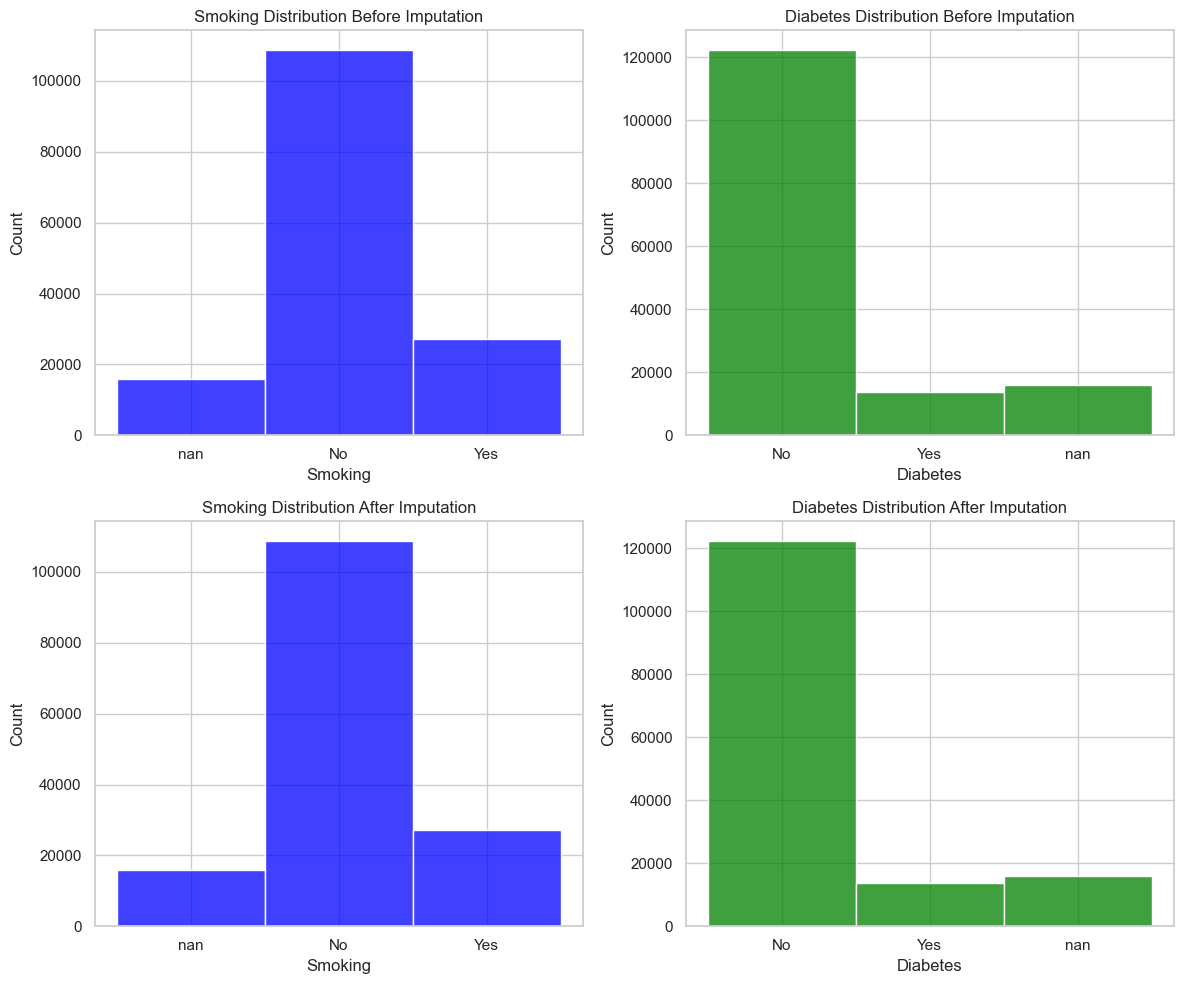


Data After KNN Imputation:
              Age  Gender      Height  ...  Cholesterol  Diabetes  Smoking
0       18.000000       0  161.777924  ...   203.000000        No      nan
1       26.021279       1  152.069157  ...   163.000000        No       No
2       32.000000       0  182.537664  ...   216.000000       Yes       No
3       30.000000       1  182.112867  ...   141.000000        No      Yes
4       23.000000       0  160.013481  ...   231.000000        No       No
...           ...     ...         ...  ...          ...       ...      ...
199993  22.000000       1  160.013481  ...   184.489838       Yes       No
199995  24.000000       1  176.503260  ...   130.000000        No       No
199996  29.000000       0  163.917675  ...   198.000000        No      Yes
199998  30.000000       0  156.446944  ...   225.000000        No       No
199999  20.000000       0  153.927409  ...   132.000000       nan       No

[152000 rows x 12 columns]


In [ ]:
# Visualize distributions before imputation
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot distributions before imputation
sns.histplot(df['Smoking'], kde=False, ax=axes[0, 0], bins=3, color='blue')
axes[0, 0].set_title("Smoking Distribution Before Imputation")

sns.histplot(df['Diabetes'], kde=False, ax=axes[0, 1], bins=3, color='green')
axes[0, 1].set_title("Diabetes Distribution Before Imputation")


def process_and_impute_data(df, categorical_columns, features_for_imputation, columns_to_impute, n_neighbors=5):
    """
    Encode categorical columns, perform KNN imputation, and decode categorical columns.

    Parameters:
        df (pd.DataFrame): The DataFrame to process.
        categorical_columns (list): List of categorical column names to encode.
        features_for_imputation (list): List of numeric feature names for imputation.
        columns_to_impute (list): List of categorical column names to include in imputation.
        n_neighbors (int): Number of neighbors for KNN imputation.

    Returns:
        pd.DataFrame: The processed DataFrame with imputed values.
    """
    # Store original encoders to revert categorical values after imputation
    encoders = {}

    # Encode categorical columns
    for col in categorical_columns:
        encoder = LabelEncoder()
        df[col] = df[col].astype(str)  # Ensure all categorical columns are strings
        df[col] = df[col].replace("nan", np.nan)  # Handle NaN values explicitly
        df[col] = encoder.fit_transform(df[col].astype(str))
        encoders[col] = encoder

    # Combine features for imputation
    impute_features = features_for_imputation + columns_to_impute

    # Subset DataFrame for imputation
    impute_data = df[impute_features]

    # Apply KNN Imputation
    knn_imputer = KNNImputer(n_neighbors=3)
    imputed_data = knn_imputer.fit_transform(impute_data)

    # Update DataFrame with imputed values
    df[impute_features] = imputed_data

    # Decode categorical columns back to original labels
    for col in columns_to_impute:
        df[col] = df[col].round().astype(int)  # Ensure integers for decoding
        df[col] = encoders[col].inverse_transform(df[col])

    return df


# Example usage
categorical_columns = ['Gender', 'Blood Type', 'Smoking', 'Diabetes']
features_for_imputation = ['Age', 'BMI', 'Heart Rate', 'Blood Pressure', 'Cholesterol']
columns_to_impute = ['Smoking', 'Diabetes']

df = process_and_impute_data(df, categorical_columns, features_for_imputation, columns_to_impute)

# Visualize distributions after imputation
sns.histplot(df['Smoking'], kde=False, ax=axes[1, 0], bins=3, color='blue')
axes[1, 0].set_title("Smoking Distribution After Imputation")

sns.histplot(df['Diabetes'], kde=False, ax=axes[1, 1], bins=3, color='green')
axes[1, 1].set_title("Diabetes Distribution After Imputation")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

# Print the DataFrame after imputation
print("\nData After KNN Imputation:")
print(df)

In [567]:
print("Missing values count for each column:")
print(df.isnull().sum())

# Check percentage of missing values
print("\nPercentage of missing values for each column:")
print((df.isnull().sum() / len(df)) * 100)

Missing values count for each column:
Age               0
Gender            0
Height            0
Weight            0
Blood Type        0
BMI               0
Temperature       0
Heart Rate        0
Blood Pressure    0
Cholesterol       0
Diabetes          0
Smoking           0
dtype: int64

Percentage of missing values for each column:
Age               0.0
Gender            0.0
Height            0.0
Weight            0.0
Blood Type        0.0
BMI               0.0
Temperature       0.0
Heart Rate        0.0
Blood Pressure    0.0
Cholesterol       0.0
Diabetes          0.0
Smoking           0.0
dtype: float64


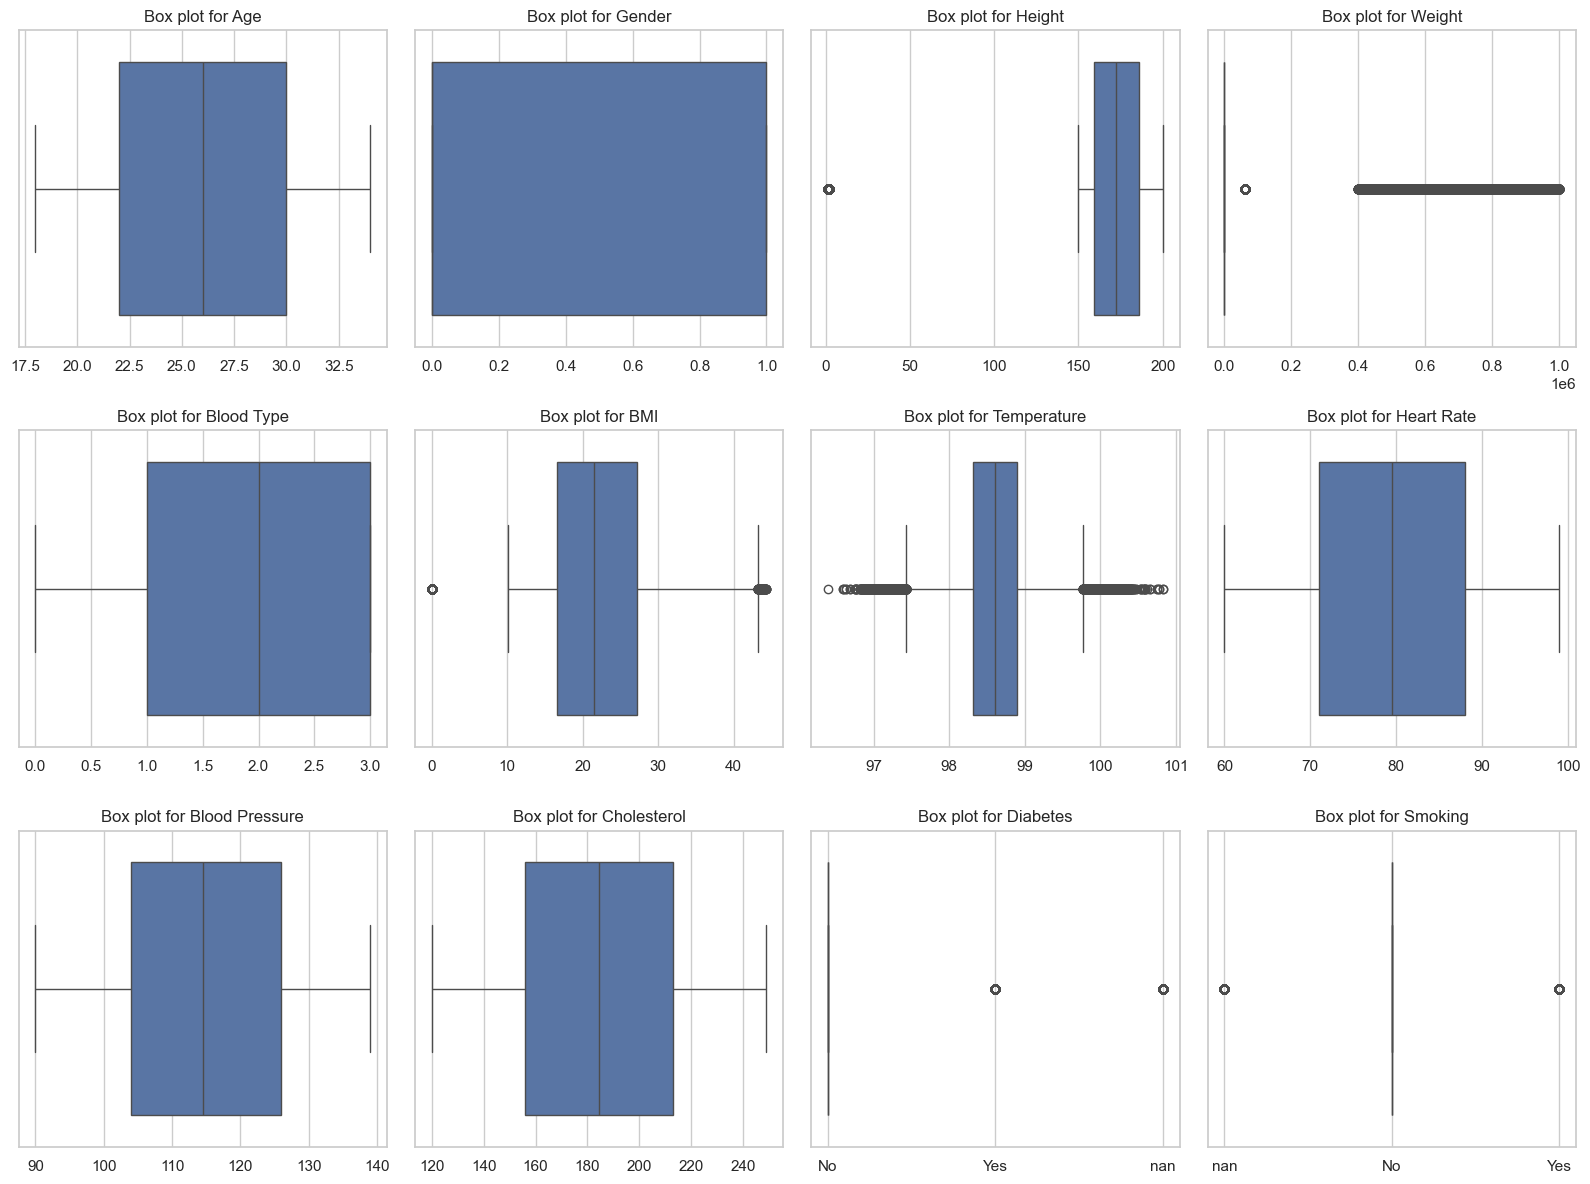

In [568]:
# Set seaborn style
sns.set(style="whitegrid")

# List of columns to visualize
columns_to_plot = [
    'Age', 'Gender', 'Height', 'Weight', 'Blood Type', 'BMI',
    'Temperature', 'Heart Rate', 'Blood Pressure', 'Cholesterol', 'Diabetes', 'Smoking'
]

# Create a 3x4 grid layout for subplots
fig, axes = plt.subplots(3, 4, figsize=(16, 12))  # Adjust figsize for better layout

# Flatten axes for easy indexing
axes = axes.flatten()

# Generate box plots for each variable
for i, col in enumerate(columns_to_plot):
    sns.boxplot(x=df[col].dropna(), ax=axes[i])  # Drop NaN to avoid plotting issues
    axes[i].set_title(f'Box plot for {col}')
    axes[i].set_xlabel('')  # Remove x-labels for compact visualization

# Turn off any unused axes
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

# Adjust the layout
plt.tight_layout()
plt.show()

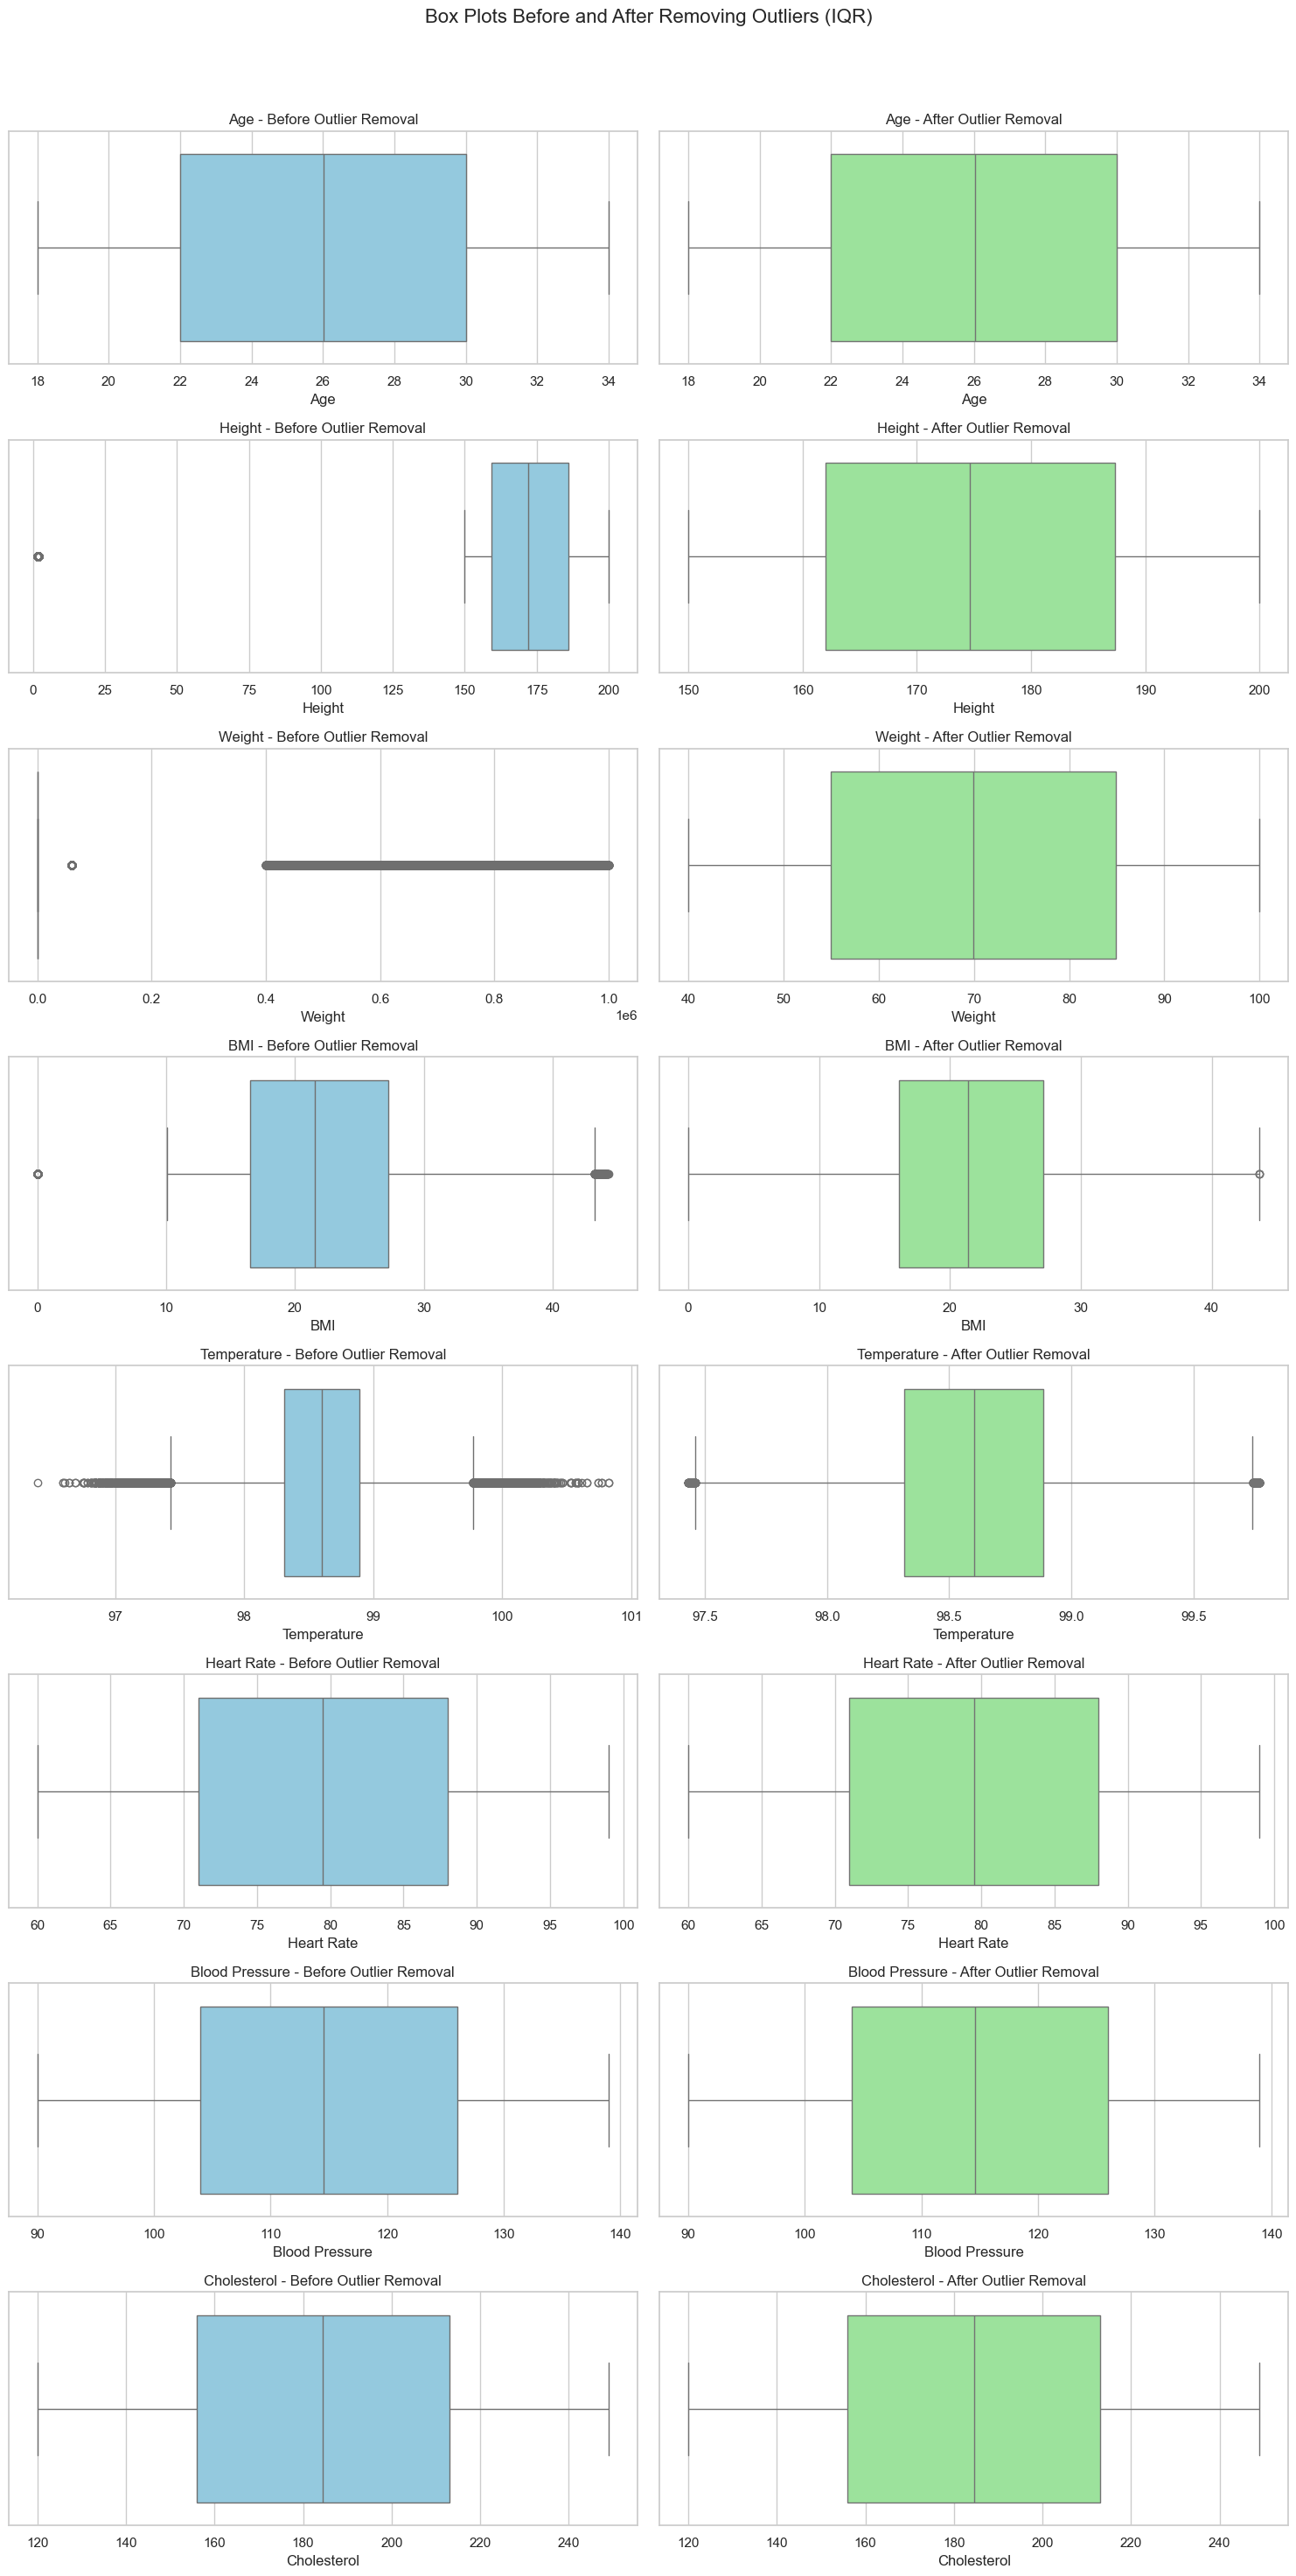

Original data shape: (190704, 12)
Data shape after removing outliers: (152000, 12)


In [569]:
# Example DataFrame setup (replace with your actual dataset)
# df = pd.read_csv('your_dataset.csv')

# List of numerical columns
numerical_columns = ['Age', 'Height', 'Weight', 'BMI', 'Temperature', 
                     'Heart Rate', 'Blood Pressure', 'Cholesterol']

# Create a copy of the original dataset
original_df = df.copy()

# Remove outliers using IQR technique
filtered_data = df.copy()

for col in numerical_columns:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = filtered_data[col].quantile(0.25)
    Q3 = filtered_data[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out rows outside the bounds
    filtered_data = filtered_data[(filtered_data[col] >= lower_bound) & 
                                  (filtered_data[col] <= upper_bound)]

# Visualize box plots for each numerical column before and after removing outliers
fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(15, len(numerical_columns) * 4))
fig.suptitle("Box Plots Before and After Removing Outliers (IQR)", fontsize=16, y=0.92)

for i, col in enumerate(numerical_columns):
    # Box plot before removing outliers
    sns.boxplot(data=original_df, x=col, ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f"{col} - Before Outlier Removal")
    
    # Box plot after removing outliers
    sns.boxplot(data=filtered_data, x=col, ax=axes[i, 1], color='lightgreen')
    axes[i, 1].set_title(f"{col} - After Outlier Removal")

plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()

# Print data shapes for comparison
print(f"Original data shape: {original_df.shape}")
print(f"Data shape after removing outliers: {filtered_data.shape}")

# Assign the filtered data back to the original DataFrame if needed
df = filtered_data

In [570]:
# Define column lists
categorical_columns = ['Blood Type', 'Gender']
numerical_columns = ['Temperature', 'Heart Rate', 'Blood Pressure', 'Cholesterol', 'Age']
columns_for_knn = ['Diabetes', 'Smoking']
numerical_computation=['Height','Weight','BMI']

In [571]:
# Wrap custom functions using FunctionTransformer
HWBMI= FunctionTransformer(compute_and_impute_remaining_values)
BT_G_Features = FunctionTransformer(impute_categorical_randomly)
DIABETES_SMOKING= FunctionTransformer(process_and_impute_data)
Numerical_imputation=FunctionTransformer(replace_nan_with_mean)


In [572]:
def remove_outliers_iqr(data):
    """
    Removes outliers using the IQR method for numerical columns in the dataset.
    """
    data = data.copy()
    if isinstance(data, pd.DataFrame):
        for column in data.select_dtypes(include=[np.number]).columns:
            Q1 = data[column].quantile(0.25)
            Q3 = data[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            # Replace outliers with NaN
            data[column] = np.where((data[column] < lower_bound) | (data[column] > upper_bound), np.nan, data[column])
    return data
# Define Outlier Removal Transformer
Outlier_Removal = FunctionTransformer(remove_outliers_iqr)



In [ ]:
# Define ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('User defined funciton', HWBMI, numerical_computation),                    # Compute and impute for Height, Weight, BMI
        ('replace with mean', Numerical_imputation, numerical_columns),          # Impute NaN for numerical columns
        ('RANDOM', BT_G_Features, categorical_columns),               # Impute NaN for categorical columns
        ('knn_impute', DIABETES_SMOKING, columns_for_knn),                # Process and impute Diabetes and Smoking
        ('num_scale', StandardScaler(), numerical_columns),               # Scale numerical features
        ('cat_encode', OneHotEncoder(), categorical_columns)              # Encode categorical features
    ]
)

# Wrap Preprocessing and Outlier Removal in a Pipeline
pipeline = Pipeline(steps=[
    ('outlier_removal', Outlier_Removal),  # Step 1: IQR Outlier Removal
    ('preprocessor', preprocessor),       # Step 2: Preprocessing
   ('classifier', MultiOutputClassifier(LogisticRegression()))  # Step 3: Multi-output Classifier
])

# Example usage:
# Assuming `X` is your feature DataFrame and `y` is the target column:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# pipeline.fit(X_train, y_train)
# predictions = pipeline.predict(X_test)


In [574]:
pipeline

Pipeline(steps=[('outlier_removal',
                 FunctionTransformer(func=<function remove_outliers_iqr at 0x0000020AD4103F60>)),
                ('preprocessor',
                 ColumnTransformer(transformers=[('User defined funciton',
                                                  FunctionTransformer(func=<function compute_and_impute_remaining_values at 0x0000020AB601FBA0>),
                                                  ['Height', 'Weight', 'BMI']),
                                                 ('replace with mean',
                                                  FunctionTransformer(func=<fun...
                                                  ['Blood Type', 'Gender']),
                                                 ('knn_impute',
                                                  FunctionTransformer(func=<function process_and_impute_data at 0x0000020AB5F73420>),
                                                  ['Diabetes', 'Smoking']),
                                                 ('num_scale', StandardScaler(),
                                                  ['Temperature', 'Heart Rate',
                                                   'Blood Pressure',
                                                   'Cholesterol', 'Age']),
                                                 ('cat_encode', OneHotEncoder(),
                                                  ['Blood Type', 'Gender'])])),
                ('classifier',
                 MultiOutputClassifier(estimator=LogisticRegression()))])

In [575]:
if 'Diabetes' in df.columns:
    print("Diabetes column exists")
else:
    print("Diabetes column is missing")


Diabetes column exists


In [576]:
print(Y_test.head())


       Diabetes Smoking
119737       No     Yes
72272       NaN      No
158154       No      No
65426        No     Yes
30074        No     NaN


In [577]:
print(df['Diabetes'].isnull().sum())


0
